In [1]:
%%manim -ql -v WARNING RiemannToIntegral

from manim import *

class RiemannToIntegral(Scene):
    def construct(self):
        plan= NumberPlane(x_range=[-4,4,1],y_range=[-4,4,1]).to_edge(DOWN)
        func = lambda x: x**2 - 3*x + 2
        graph = plan.plot(func, color=BLUE, x_range=[-4, 4])

        labels = plan.get_axis_labels(x_label='x', y_label='f(x)')
        graph_label = MathTex("f(x) = x^2 - 3x + 2").next_to(graph, RIGHT, buff=0.1).set_color(GREEN)

        self.play(DrawBorderThenFill(plan), run_time=2)
        self.play(Create(plan), Create(graph), Write(graph_label))
        self.wait(0.3)

        rectangles = plan.get_riemann_rectangles(graph, x_range=[-4,4], dx=1, color=BLUE) # , stroke_width=0.5
        self.play(FadeIn(rectangles))
        self.wait(0.3)

        def update_grap(graph, dt):
            new_dx = max(0.1, graph.dx - 0.005)
            graph.become(plan.get_riemann_rectangles(graph, x_range=[-4,4], dx=new_dx, stroke_width=0.5, color=BLUE))
            graph.dx = new_dx
        
        rectangles.dx = 1
        
        rectangles.add_updater(update_grap)
        self.play(UpdateFromAlphaFunc(rectangles, lambda m, dt: m.update_graph(dt)))
        rectangles.clear_updaters()
        self.wait(1)

RiemannToIntegral

UsageError: Cell magic `%%manim` not found.


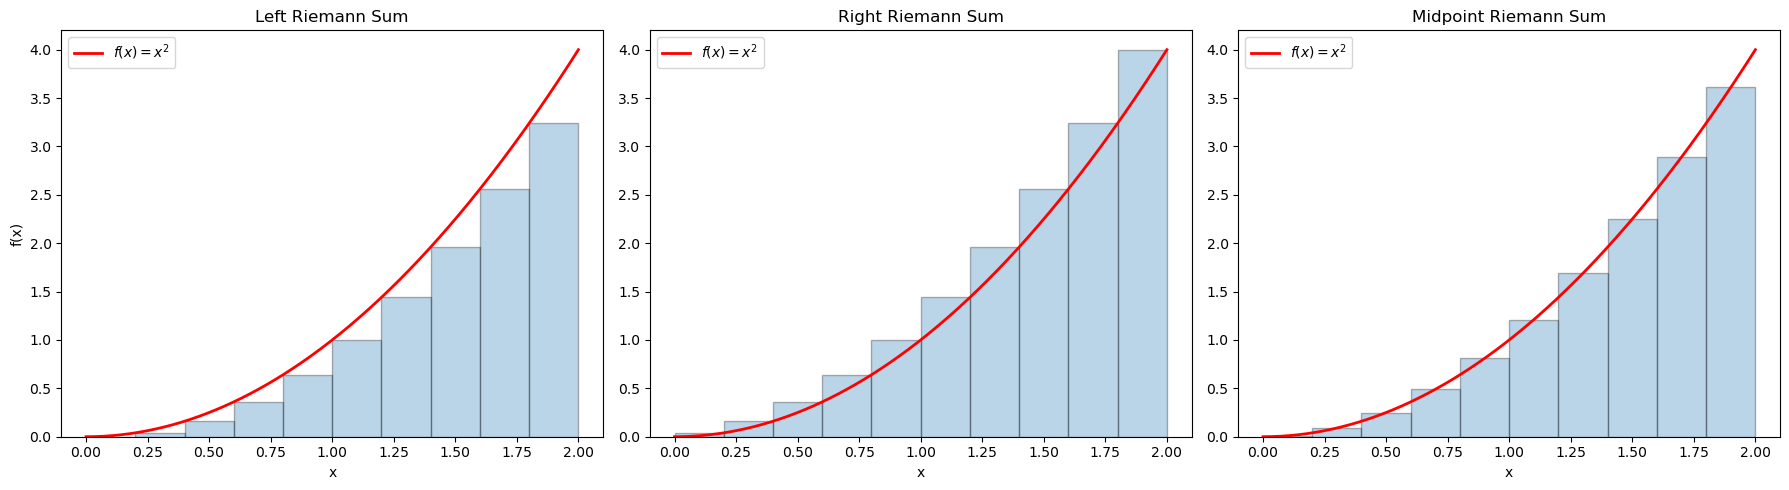

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to integrate
def f(x):
    return x**2

# Define the interval and number of rectangles
a, b = 0, 2
n = 10  # Number of subintervals
dx = (b - a) / n

# Define sample points for each method
x_left = np.linspace(a, b - dx, n)          # Left endpoints
x_right = np.linspace(a + dx, b, n)           # Right endpoints
x_mid = (x_left + x_right) / 2                # Midpoints

# Evaluate the function at these points
y_left = f(x_left)
y_right = f(x_right)
y_mid = f(x_mid)

# Fine grid for plotting the continuous function
x_vals = np.linspace(a, b, 400)
y_vals = f(x_vals)

# Create subplots for the three Riemann sum methods
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Left Riemann Sum
axs[0].plot(x_vals, y_vals, 'r', linewidth=2, label='$f(x)=x^2$')
# Draw the rectangles
axs[0].bar(x_left, y_left, width=dx, align='edge', alpha=0.3, edgecolor='black')
axs[0].set_title('Left Riemann Sum')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].legend()

# Right Riemann Sum
axs[1].plot(x_vals, y_vals, 'r', linewidth=2, label='$f(x)=x^2$')
axs[1].bar(x_right - dx, y_right, width=dx, align='edge', alpha=0.3, edgecolor='black')
axs[1].set_title('Right Riemann Sum')
axs[1].set_xlabel('x')
axs[1].legend()

# Midpoint Riemann Sum
axs[2].plot(x_vals, y_vals, 'r', linewidth=2, label='$f(x)=x^2$')
axs[2].bar(x_mid - dx/2, y_mid, width=dx, align='edge', alpha=0.3, edgecolor='black')
axs[2].set_title('Midpoint Riemann Sum')
axs[2].set_xlabel('x')
axs[2].legend()

plt.tight_layout()
plt.show()